In [1]:
import gymnasium as gym
import numpy as np
from gymnasium.wrappers import FlattenObservation, TimeLimit
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3 import PPO, A2C, DQN, TD3
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
from nfv_env import NfvEnv
from env_utils import TrafficGen

2024-02-08 15:55:41.284442: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-08 15:55:41.286207: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 15:55:41.311461: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 15:55:41.311484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 15:55:41.312133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
log_dir = "logs/"

def make_env(**env_par):
    env = NfvEnv(**env_par)
    # flatten observation space from Dict to vector
    env = FlattenObservation(env)
    # add time limit to create episodes
    env = TimeLimit(env, 1000)
    # add Monitor wrapper (already added by make_vec_env?)
    env = Monitor(env, log_dir)
    return env

# Instantiate the env
max_traffic = 6000

test_env = make_vec_env(make_env, n_envs=1, env_kwargs={'max_traffic':max_traffic, 'traffic_gen':'sin'})
#env = make_env()

created NFV scaling environment
with max traffic:  6000
with max instances:  100


In [3]:
# Load the trained agent from file
model_name = "saved models/PPO_sin_500k_rew3_stable2"
model = PPO.load(model_name, env=test_env)

In [4]:
# Test the trained agent

obs = test_env.reset()
n_steps = 1000

actions = []
counter = []
traffics = []
powers = []
instances = []
optimal = []
rewards = []
traffic_instances = []

for step in range(n_steps):
    action, _ = model.predict(obs, deterministic=True)
    #print(f"Step {step + 1}")
    #print("Action: ", action)
    actions.append(action)
    obs, reward, terminated, info = test_env.step(action)
    #print(obs)
    #! observation space is flattened in alphabetical order!
    
    powers.append(obs[0][1])
    traffics.append(info[0]['req_traffic'])
    optimal.append(info[0]['optimal_instances'])
    traffic_instances.append(info[0]['traffic_vnfs'])
    instances.append(obs[0][0])
    rewards.append(reward[0])
    counter.append(info[0]['instance_counter'])

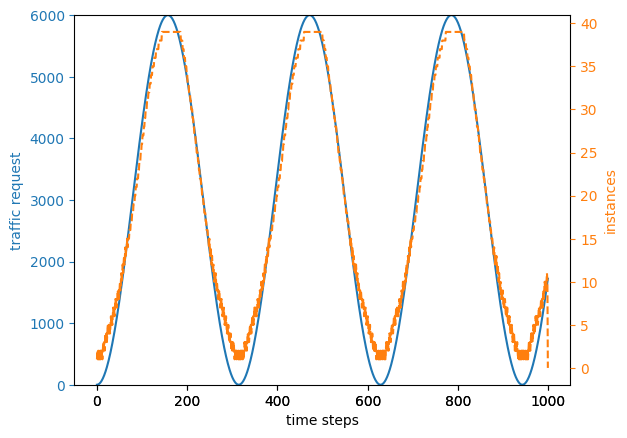

In [5]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111, label="traffics")
ax2=fig.add_subplot(111, label="intances", frame_on=False)
#ax3=fig.add_subplot(111, label="optimal", frame_on=False)

ax.plot(traffics, color="C0", alpha=1)
ax.set_ylabel("traffic request", color="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0, max_traffic) 

ax2.plot(instances, color="C1", linestyle='dashed')
ax2.yaxis.tick_right()
#ax2.set_ylim(0, max_traffic)
ax2.set_ylabel("instances", color="C1")       
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors="C1")
ax2.yaxis.get_major_locator().set_params(integer=True)

#ax3.plot(optimal, color="C3", alpha= 1, linestyle='dotted')

plt.xlabel('time steps')
plt.show()

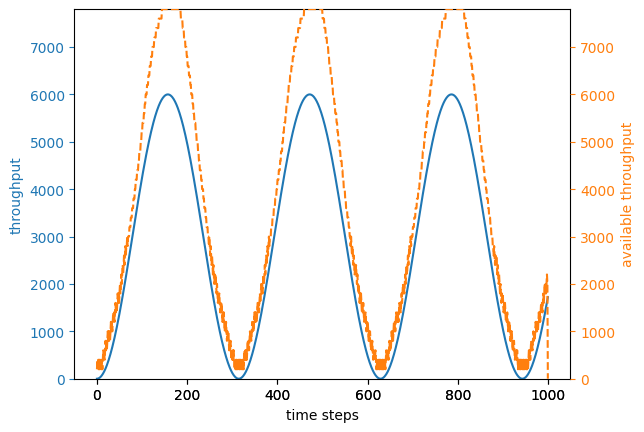

In [6]:
vnf_max_traffic = 200 # it has to match the value defined in the environment
available_traffics = [inst * vnf_max_traffic for inst in instances]

max_y = max(max(traffics),max(available_traffics))

fig=plt.figure()
ax=fig.add_subplot(111, label="throughput")
ax2=fig.add_subplot(111, label="available_throughput", frame_on=False)

ax.plot(traffics, color="C0", alpha=1)
ax.set_ylabel("throughput", color="C0")
ax.tick_params(axis='y', colors="C0")
ax.set_ylim(0, max_y) 

ax2.plot(available_traffics, color="C1", linestyle='dashed')
ax2.yaxis.tick_right()
ax2.set_ylim(0, max_y)
ax2.set_ylabel("available throughput", color="C1")       
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y', colors="C1")
ax2.yaxis.get_major_locator().set_params(integer=True)

#ax3.plot(optimal, color="C3", alpha= 1, linestyle='dotted')

plt.xlabel('time steps')
plt.show()

In [7]:
#print(instances)

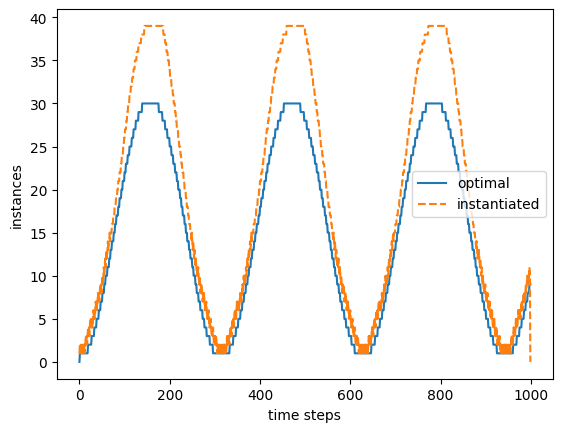

In [8]:
plt.plot(optimal, label ="optimal")
plt.plot(instances, linestyle='dashed', label ="instantiated")
plt.ylabel('instances')
plt.xlabel('time steps')
plt.legend()
plt.show()

In [9]:
#print(optimal)

In [10]:
print(actions) #why sometimes jittery actions?

[array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([0]), array([2]), array([0]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([2]), array([0]), array([2]), array([1]), array([2]), array([0]), array([2]), array([1]), array([1]), array([2]), array([1]), array([1]), array([2]), array([1]), array([1]), array([2]), array([1]), array([1]), array([2]), array([1]), arr

In [11]:
#print(counter)

In [12]:
#print(rewards)

In [13]:
#print(powers)

In [14]:
stepn = 666

print('requested traffic: ', traffics[stepn])
print('available traffic: ', available_traffics[stepn])
print('offered traffic: ', sum(traffic_instances[stepn]))
print('in intances: ', len(traffic_instances[stepn]))
print('optimal instances: ', optimal[stepn])
print(traffic_instances[stepn])

requested traffic:  812.36962404414
available traffic:  1200.0
offered traffic:  812.3696240441401
in intances:  6
optimal instances:  5
[135.39493734069, 135.39493734069, 135.39493734069, 135.39493734069, 135.39493734069, 135.39493734069]
